In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

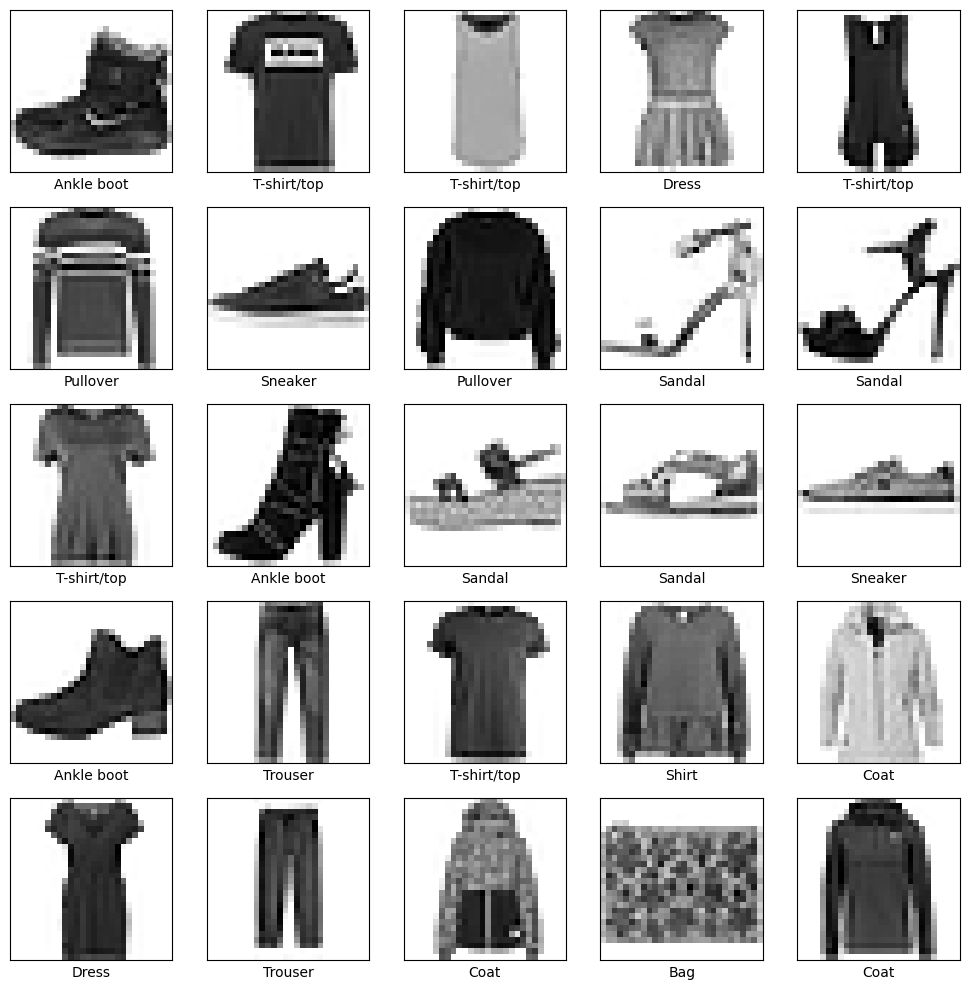

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some samples from the dataset
def plot_samples(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):  # Display 25 images
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.tight_layout()
    plt.show()

# Display some training samples
plot_samples(x_train, y_train, class_names)

In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [11]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

print(f"TensorBoard logs will be saved in {log_dir}")

TensorBoard logs will be saved in logs/fit/20241210-123049


In [15]:
# Train the model
history = model.fit(
    x_train, y_train_cat, 
    validation_data=(x_test, y_test_cat), 
    epochs=10, 
    batch_size=32, 
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7744 - loss: 0.6419 - val_accuracy: 0.8296 - val_loss: 0.4586
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8611 - loss: 0.3822 - val_accuracy: 0.8520 - val_loss: 0.4227
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8776 - loss: 0.3378 - val_accuracy: 0.8649 - val_loss: 0.3681
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8880 - loss: 0.3076 - val_accuracy: 0.8743 - val_loss: 0.3614
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8907 - loss: 0.2935 - val_accuracy: 0.8728 - val_loss: 0.3522
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8947 - loss: 0.2798 - val_accuracy: 0.8769 - val_loss: 0.3471
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9018 - loss: 0.2621 - val_accuracy: 0.8788 - val_loss: 0.3421
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9082 - loss: 0

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8803 - loss: 0.3302
Test Accuracy: 0.88


In [19]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.8827 - loss: 0.3305
Test Loss: 0.3305
Test Accuracy: 0.8827


In [21]:
# Save the entire model
model.save('fashion_mnist_model.h5')
print("Model saved as 'fashion_mnist_model.h5'")

Model saved as 'fashion_mnist_model.h5'


In [23]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('fashion_mnist_model.h5')

# Evaluate the loaded model to ensure it's the same
loss, accuracy = loaded_model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Loaded Model Accuracy: {accuracy:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.8827 - loss: 0.3305
Loaded Model Accuracy: 0.8827


In [25]:
import numpy as np

# Predict on a few test samples
predictions = model.predict(x_test[:5])

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the results
print("Predicted Labels:", predicted_labels)
print("True Labels:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Predicted Labels: [9 2 1 1 6]
True Labels: [9 2 1 1 6]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


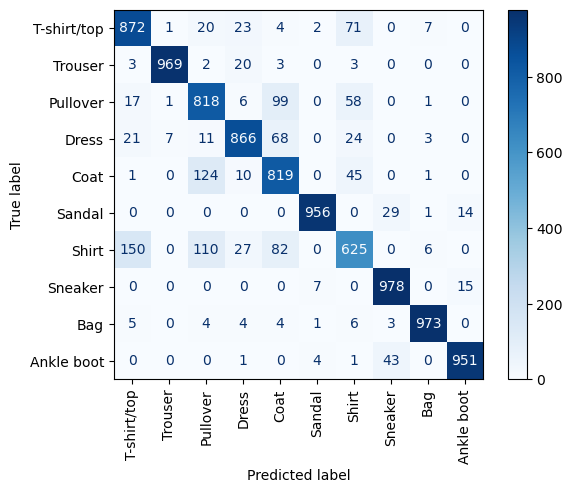

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

In [29]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = 'fashion_mnist_model.h5'  # Path to your saved model
loaded_model = load_model(model_path)

print(f"Model loaded from {model_path}")

Model loaded from fashion_mnist_model.h5


In [31]:
# Print the architecture of the loaded model
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [33]:
# Get the number of parameters for the original and loaded models
original_params = model.count_params()  # From the original model
loaded_params = loaded_model.count_params()  # From the loaded model

print(f"Original Model Parameters: {original_params}")
print(f"Loaded Model Parameters: {loaded_params}")

if original_params == loaded_params:
    print("The number of parameters matches between the original and loaded models.")
else:
    print("Mismatch in the number of parameters!")

Original Model Parameters: 109386
Loaded Model Parameters: 109386
The number of parameters matches between the original and loaded models.


In [35]:
# Compare weights of each layer
original_weights = model.get_weights()
loaded_weights = loaded_model.get_weights()

weights_match = all(
    (original_layer == loaded_layer).all()
    for original_layer, loaded_layer in zip(original_weights, loaded_weights)
)

if weights_match:
    print("The weights match between the original and loaded models.")
else:
    print("Mismatch in weights!")

The weights match between the original and loaded models.


In [37]:
# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test_cat, verbose=2)

print(f"Loaded Model Test Loss: {test_loss:.4f}")
print(f"Loaded Model Test Accuracy: {test_accuracy:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.8827 - loss: 0.3305
Loaded Model Test Loss: 0.3305
Loaded Model Test Accuracy: 0.8827
